# Units and Quantities

## Objectives

- Use units
- Create functions that accept quantities as arguments
- Create new units

## Basics

How do we define a Quantity and which parts does it have?

In [4]:
import astropy.units as u

In [6]:
# Define a quantity length
length = 26.2 * u.meter
# print it
print(length) # length is a quantity

26.2 m


In [7]:
# Type of quantity
type(length)
# Type of unit
type(u.meter)
# Quantity
length
# value
length.value
# unit
length.unit
# information
length.info


dtype = float64
unit = m
class = Quantity
n_bad = 0

In [8]:
# Convert it to: km, lyr
print(length.to(u.km))
print(length.to(u.lightyear))

0.0262 km
2.7693421851444923e-15 lyr


In [9]:
# arithmetic with distances
distance_start = 10 * u.mm
distance_end = 23 * u.km
length = distance_end - distance_start
print(length)

22.99999 km


In [10]:
# calculate a speed
time = 15 * u.minute
speed = length / time
print(speed)

1.5333326666666667 km / min


In [11]:
# decompose it
print(speed.decompose())
print(speed.si)

25.555544444444447 m / s
25.555544444444447 m / s


Quantities can be converted to other units systems or factors by using `to()`

In [ ]:
# Convert it to: km, lyr
print(length.to(u.km))
print(length.to(u.lightyear))

We can do arithmetic operations when the quantities have the compatible units:

In [ ]:
# arithmetic with distances
distance_start = 10 * u.mm
distance_end = 23 * u.km
length = distance_end - distance_start
print(length)

Quantities can also be combined, for example to measure speed

In [ ]:
# decompose it
print(speed.decompose())
print(speed.si)


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Unit conversions</h2>
</div>


<div class="panel-body">

<ol>
<li>Convert the speed in imperial units (miles/hour) using:
    <code>from astropy.units import imperial</code></li>
<li>Calculate whether a pint is more than half litre.
    <em>You can compare quantities as comparing variables.</em>
    Something strange? Check what deffinition of <a href="https://en.wikipedia.org/wiki/Pint">pint</a> astropy is using.</li>
<li>Does units work with areas? calculate the area of a rectangle of 3 km of side and 5 meter of width. Show them in $m^2$ and convert them to yards$^2$</li>
</ol>

</div>

</section>


In [13]:
from astropy.units import imperial

AttributeError: module 'astropy.units.imperial' has no attribute 'liter'

## Composed units

Many units are compositions of others, for example, one could create new combinationes for ease of use:

In [18]:
cms = u.cm / u.s
print(cms)
print(speed.to(cms))

cm / s
2555.5544444444445 cm / s


and others are already a composition:

In [19]:
(u.s ** -1).compose()

[Unit("Hz"), Unit("Bq"), Unit("2.7027e-11 Ci")]

In [20]:
u.joule.compose()

[Unit("J"), Unit("1e+07 erg"), Unit("4.58742e+17 Ry"), Unit("6.24151e+18 eV")]

Sometime we get *no units* quantitites

In [22]:
nounits = 20 * u.cm /(1 * u.m)
nounits.decompose()

<Quantity 0.2>

What happen if we add a number to this?

In [25]:
print(nounits.unit, type(nounits.unit))
nounits + 3

cm / m <class 'astropy.units.core.CompositeUnit'>


<Quantity 3.2>

## Equivalencies

Some conversions are not done by a conversion factor as between miles and kilometers, for example converting between wavelength and frequency.

Other built-in equivalencies are: 
 - `parallax()`
 - Doppler (`dopplr_radio`, `doppler_optical`, `doppler_relativistic`)
 - spectral flux density
 - brigthness temperature
 - temperature energy
 - and you can [build your own](http://astropy.readthedocs.org/en/stable/units/equivalencies.html#writing-new-equivalencies)

## Printing the quantities

## Arrays

Quantities can also be applied to arrays

In [29]:
# different ways of defining a quantity for a single value
length = 44 * u.m
time = u.Quantity(23, u.s)
speed = length / time
speed

<Quantity 1.91304348 m / s>

In [30]:
# now with lists
length_list = [1, 2, 3] * u.m

# and arrays
import numpy as np
time_array = np.array([1, 2, 3]) * u.s

# and its arithmetics
length_list / time_array

<Quantity [1., 1., 1.] m / s>

In [31]:
# angles are smart!
angle = u.Quantity(np.arange(180), u.deg)
print(angle[[0, -1]])
print(np.sin(angle[[0, -1]]))

[  0. 179.] deg
[0.         0.01745241]


## Plotting quantities

To work nicely with matplotlib we need to do as follows:

In [32]:
# allowing for plotting
from astropy.visualization import quantity_support
quantity_support()

# loading matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

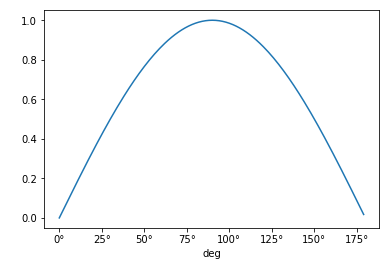

In [33]:
# Ploting the previous array
plt.plot(angle, np.sin(angle))

## Creating functions with quantities as units

We want to have functions that contain the information of the untis, and with them we can be sure that we will be always have the *right* result.

In [41]:
@u.quantity_input 
def kinetic(mass=u.kg, speed=u.m/u.s)
    return (mass * speed ** 2 / 2).to(u.joule)

SyntaxError: invalid syntax (<ipython-input-41-29ed2fb7e499>, line 2)

In [39]:
kinetic(5, 10)

TypeError: Argument 'mass' to function 'kinetic' has no 'unit' attribute. You may want to pass in an astropy Quantity instead.

In [40]:
kinetic(5*u.kg, 10*cms)

<Quantity 0.025 J>


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Using `quantity_input`</h2>
</div>


<div class="panel-body">

<ol>
<li>Create a function that calculates potential energy where $g$ defaults to Earth value, but could be used for different planets. Test it for any of the $g$ values for any other <a href="http://www.physicsclassroom.com/class/circles/Lesson-3/The-Value-of-g&quot;">planets</a>.</li>
</ol>

</div>

</section>


## Create your own units

Some times we want to create our own units:


<section class="challenge panel panel-success">
<div class="panel-heading">
<h2><span class="fa fa-pencil"></span> Area with units</h2>
</div>


<div class="panel-body">

<ol>
<li>Convert the area calculated before <code>rectangle_area</code> in <a href="https://en.wikipedia.org/wiki/Hectare">hectares</a> (1 hectare = 100 ares; 1 are = 100 $m^2$).</li>
</ol>

</div>

</section>
